In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json('test_cian_filtered2.json')
df.shape

(560, 9)

In [4]:
df.head()


,cityId,city_name,disctrict_name,district_id,lat,lng,price,space,url
0,2,Санкт-Петербург,Приморский,136,60.021375,30.266928,11000000,57.20,https://spb.cian.ru/sale/flat/268954096/
1,2,Санкт-Петербург,Приморский,136,60.012228,30.249114,10000000,73.40,https://spb.cian.ru/sale/flat/269090039/
2,2,Санкт-Петербург,Красногвардейский,144,59.938073,30.405713,37031100,139.74,https://spb.cian.ru/sale/flat/267463355/
3,2,Санкт-Петербург,Приморский,136,60.036704,30.234319,13980000,68.90,https://spb.cian.ru/sale/flat/264011384/
4,2,Санкт-Петербург,Приморский,136,60.037935,30.232855,14900000,79.00,https://spb.cian.ru/sale/flat/267509283/


In [5]:
df['per_meter'] = df['price'] / df['space']

In [6]:
df.head()

,cityId,city_name,disctrict_name,district_id,lat,lng,price,space,url,per_meter
0,2,Санкт-Петербург,Приморский,136,60.021375,30.266928,11000000,57.20,https://spb.cian.ru/sale/flat/268954096/,192307.692308
1,2,Санкт-Петербург,Приморский,136,60.012228,30.249114,10000000,73.40,https://spb.cian.ru/sale/flat/269090039/,136239.782016
2,2,Санкт-Петербург,Красногвардейский,144,59.938073,30.405713,37031100,139.74,https://spb.cian.ru/sale/flat/267463355/,265000.000000
3,2,Санкт-Петербург,Приморский,136,60.036704,30.234319,13980000,68.90,https://spb.cian.ru/sale/flat/264011384/,202902.757620
4,2,Санкт-Петербург,Приморский,136,60.037935,30.232855,14900000,79.00,https://spb.cian.ru/sale/flat/267509283/,188607.594937


In [219]:
bins = df.groupby('disctrict_name').mean()['per_meter'].shape[0]
df.groupby('disctrict_name').mean()['price']

disctrict_name
Адмиралтейский       3.316332e+07
Василеостровский     2.646877e+07
Выборгский           2.034469e+07
Калининский          1.274697e+07
Кировский            1.402775e+07
Красногвардейский    1.657541e+07
Красносельский       1.060280e+07
Курортный            2.922444e+07
Московский           1.836090e+07
Невский              1.286337e+07
Петроградский        8.795238e+07
Приморский           1.686736e+07
Пушкинский           1.259894e+07
Фрунзенский          1.041199e+07
Центральный          4.610013e+07
Name: price, dtype: float64

In [220]:
districts = df.groupby('disctrict_name').mean()['price'].keys()
prices = df.groupby('disctrict_name').mean()['price'].values / 10**6
label_fontsize = 22
params = {'legend.fontsize': 'large',
          'figure.figsize': (10,25),
          'axes.labelsize': label_fontsize,
          'axes.titlesize': label_fontsize,
          'xtick.labelsize': label_fontsize*0.75,
          'ytick.labelsize': label_fontsize*0.75,
          'axes.titlepad': 25}


In [221]:
def plot_disctrict_bar_statistic(district_names, district_value,
                                 bar_title: str, x_label: str, y_label: str,
                                 params: dict, save_name: str):
       

        plt.rcParams.update(params)
        sns.set_style('darkgrid')
        bar = sns.barplot(x=district_value, y=district_names)
        bar.set(xlabel=x_label, ylabel=y_label, title=bar_title)
        plt.bar_label(bar.containers[0], fmt='%.2f')      
        plt.savefig(save_name, bbox_inches='tight')

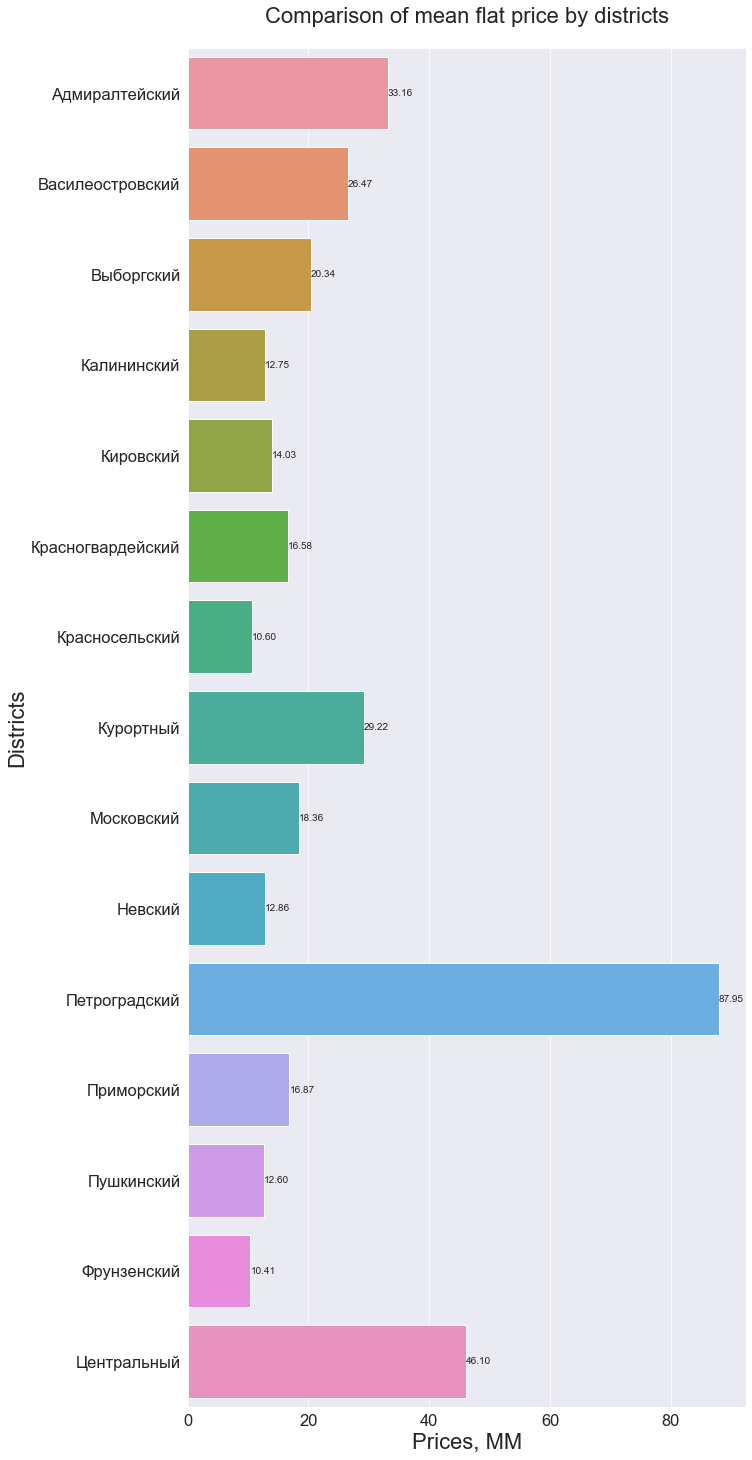

In [222]:
plot_disctrict_bar_statistic(districts, prices,
                             bar_title='Comparison of mean flat price by districts',
                             x_label='Prices, MM',
                             y_label='Districts',
                             params=params,
                             save_name='output/price.png')

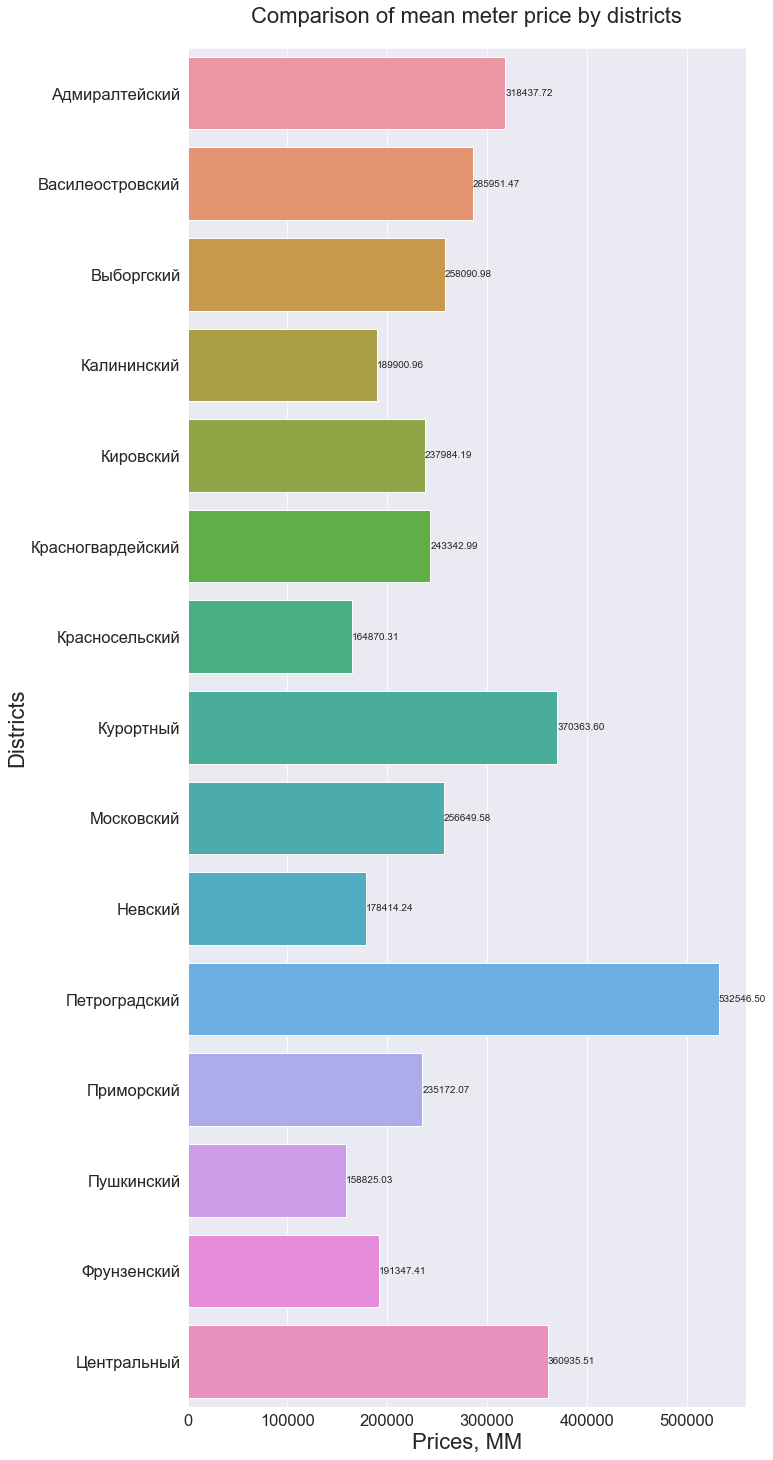

In [223]:
meter_prices = df.groupby('disctrict_name').mean()['per_meter'].values

plot_disctrict_bar_statistic(districts, meter_prices,
                             bar_title='Comparison of mean meter price by districts',
                             x_label='Prices, MM',
                             y_label='Districts',
                             params=params,
                             save_name='output/meter_price.png')

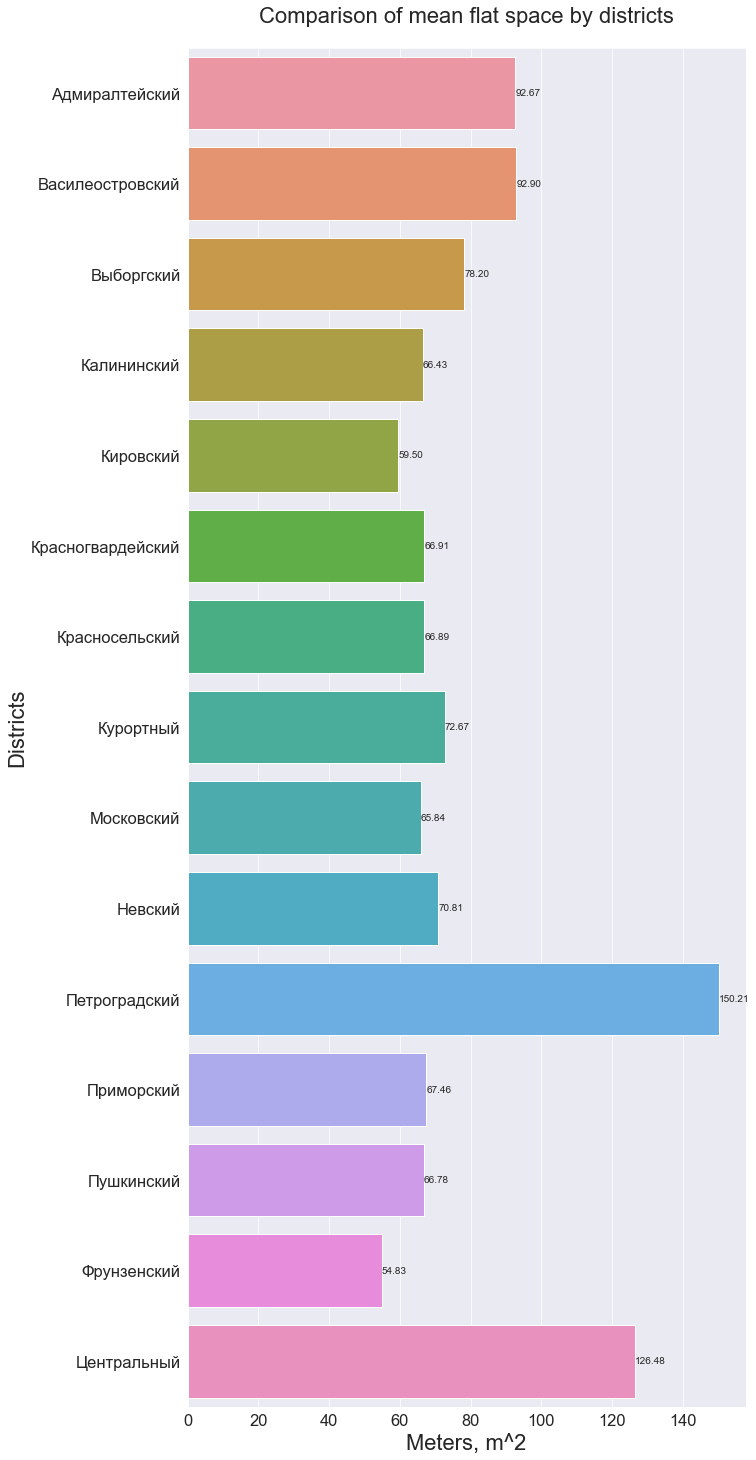

In [224]:
spaces = df.groupby('disctrict_name').mean()['space'].values

plot_disctrict_bar_statistic(districts, spaces,
                             bar_title='Comparison of mean flat space by districts',
                             x_label='Meters, m^2',
                             y_label='Districts',
                             params=params,
                             save_name='output/space.png')

In [225]:
from scipy.interpolate import LinearNDInterpolator, Rbf

In [226]:
def get_boundaries(df):
    right = df['lng'].max()
    left = df['lng'].min()
    top = df['lat'].max()
    bottom = df['lat'].min()
    return (right, left, top, bottom)

xmin=149 xmax=149 ymin=74 ymax=74
Opening: http://a.tile.openstreetmap.org/8/149/74.png


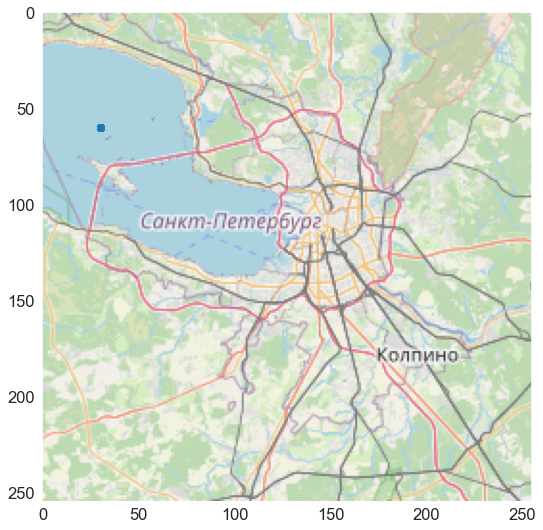

In [266]:
from data_fetching.map_fetcher import getImageCluster

from PIL import Image

spb_coords = get_boundaries(df)
a = (spb_coords[0] + spb_coords[1]) / 2
b = (spb_coords[2] + spb_coords[3]) / 2
spb_map = getImageCluster(b, a, 0.04,  0.01, 8)
x = df['lng']
y = df['lat']

_, ax = plt.subplots(figsize=(9,9))

ax.scatter(x, y, zorder=2, )
ax.imshow(np.asarray(spb_map), zorder=1)
# plt.savefig('dots.png')
plt.show()


In [ ]:
30.1615825, 59.9305475

In [47]:
t = df['per_meter']
xmax = t.max()
xmin = t.min()
norm = lambda x: (x - xmin)/ (xmax - xmin)

interval_min = 1
interval_max = 10
scaled_mat = lambda x: (x - xmin) / (xmax - xmin) * (interval_max - interval_min) + interval_min
t = t.apply(scaled_mat)

In [48]:
t

0      1.506159
1      1.180127
2      1.928860
3      1.567769
4      1.484643
         ...   
555    1.312591
556    1.277004
557    1.931691
558    1.334759
559    1.635053
Name: per_meter, Length: 560, dtype: float64

In [49]:
import folium
from folium.plugins import HeatMap
map = folium.Map(location=[59.9305475, 30.1615825], zoom_start = 11)
lat = df['lat'].to_list()
long = df['lng'].to_list()
price = df['per_meter'].to_list()

HeatMap(list(zip(lat, long, t))).add_to(map)

In [50]:
map

In [26]:
df.groupby('disctrict_name').mean()['per_meter'].sort_values(ascending=False)

disctrict_name
Петроградский        532546.496714
Курортный            370363.601464
Центральный          360935.512695
Адмиралтейский       318437.722086
Василеостровский     285951.465872
Выборгский           258090.979531
Московский           256649.583029
Красногвардейский    243342.989980
Кировский            237984.189811
Приморский           235172.071125
Фрунзенский          191347.410231
Калининский          189900.963129
Невский              178414.238869
Красносельский       164870.313062
Пушкинский           158825.025378
Name: per_meter, dtype: float64

In [ ]:
x_new = xi - xmin / xmax - xmin

In [39]:
t = df['per_meter']
xmax = t.max()
xmin = t.min()
norm = lambda x: (x - xmin)/ (xmax - xmin)
t.apply(norm)
t = t.apply(norm)

0      192307.692308
1      136239.782016
2      265000.000000
3      202902.757620
4      188607.594937
           ...      
555    159019.607843
556    152899.824253
557    265486.725664
558    162831.858407
559    214473.684211
Name: per_meter, Length: 560, dtype: float64

In [32]:
t

0      192307.692308
1      136239.782016
2      265000.000000
3      202902.757620
4      188607.594937
           ...      
555    159019.607843
556    152899.824253
557    265486.725664
558    162831.858407
559    214473.684211
Name: per_meter, Length: 560, dtype: float64